## Clustering of customers

### Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Reading a csv file from local disk

In [3]:
data= pd.read_csv('C:\\Users\\Larry Williams\\Desktop\\Mamata\\Edvancer\\data\\data\\Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Checking null values

In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Dropping CustomerID column which is not useful for the model

In [6]:
data.drop('CustomerID', inplace=True, axis=1)

### Converting categorical columns to numeric columns using one-hot encoding

In [7]:
data= pd.get_dummies(data, drop_first=True)

### Performing Normalization

In [8]:
from scipy.stats import zscore

In [9]:
a=data.apply(zscore)

In [10]:
a.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


### Selecting the optimal K value

In [21]:
e=[]
for i in range(1,11) :
    k=KMeans(n_clusters=i)
    k.fit(data)
    e.append(k.inertia_)

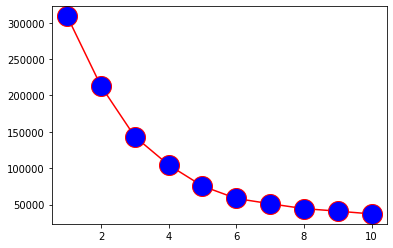

In [22]:
plt.plot(range(1,11),e,color="red",marker="o",markerfacecolor="blue",markersize=20)

## Optimal value here is K=6

In [23]:
k=KMeans(n_clusters=6)
k.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Making predections

In [26]:
pred=k.predict(data)
pred

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 0,
       5, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

### silhouette score

We can evaluate the performance of the model by  Silhoutte_score. It Ranges from -1 to +1.
-1 meaning that the sample have been placed in the wrong cluster
0 meaning that the mean distance from the cluster to the sample is small.
+1 meaning that the mean distance from the cluster to the sample is large

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
print(silhouette_score(data,pred))


0.45205475380756527


In [29]:
import numpy as np
data=np.array(data)


### Visuvalizing the Clusters

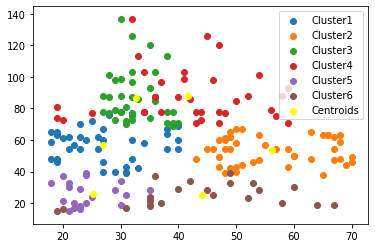

In [32]:
plt.scatter(data[pred==0,0],data[pred==0,1],cmap="spring",label="Cluster1")
plt.scatter(data[pred==1,0],data[pred==1,1],cmap="winter",label="Cluster2")
plt.scatter(data[pred==2,0],data[pred==2,1],cmap="muted",label="Cluster3")
plt.scatter(data[pred==3,0],data[pred==3,1],cmap="summer",label="Cluster4")
plt.scatter(data[pred==4,0],data[pred==4,1],cmap="coolwarm",label="Cluster5")
plt.scatter(data[pred==5,0],data[pred==5,1],cmap="Blues",label="Cluster6")
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color="yellow",label="Centroids")
plt.legend()

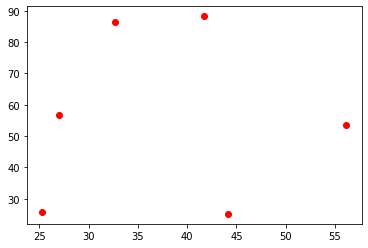

In [33]:
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color="red")